In [2]:
from google.colab import files
uploaded=files.upload()


Saving SuperStore.xlsx to SuperStore.xlsx


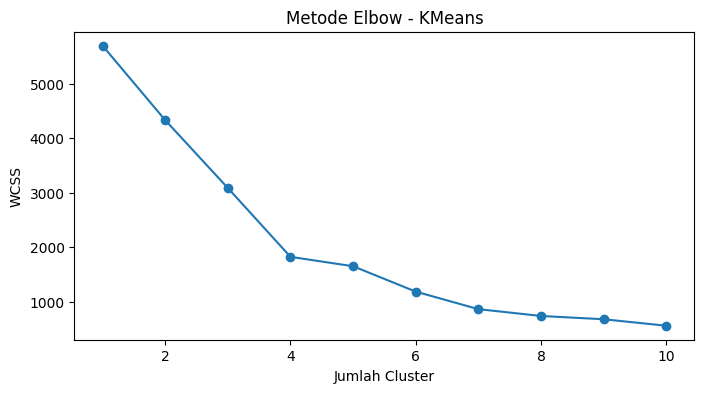

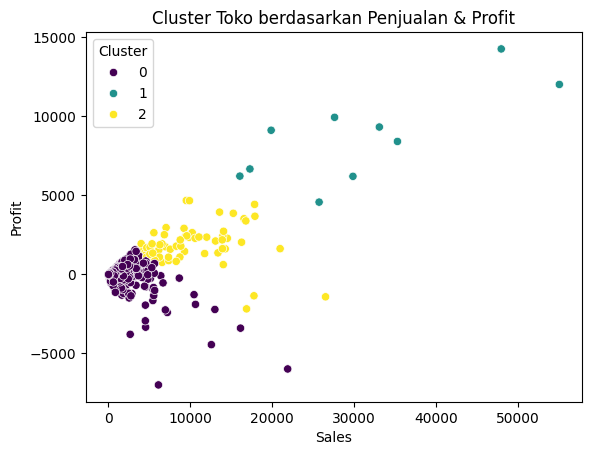

In [4]:
# --- K-MEANS CLUSTERING SUPERSTORE ---
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel("SuperStore.xlsx")

# Data preparation
df['Order Date'] = pd.to_datetime(df['Order_Date'])
df['Month'] = df['Order_Date'].dt.month
df['Year'] = df['Order_Date'].dt.year

# Aggregasi data berdasarkan Cabang/Waktu
grouped = df.groupby(['City', 'Month']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Discount': 'mean'
}).reset_index()

# Preprocessing untuk clustering
features = ['Sales', 'Profit', 'Discount']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(grouped[features])

# Tentukan jumlah cluster optimal (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow - KMeans')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

# Clustering dengan k (misal: 3)
kmeans = KMeans(n_clusters=3, random_state=42)
grouped['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualisasi hasil clustering
sns.scatterplot(data=grouped, x='Sales', y='Profit', hue='Cluster', palette='viridis')
plt.title('Cluster Toko berdasarkan Penjualan & Profit')
plt.show()
